In [1]:
import Bowtie

/home/chospa/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [61]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [94]:
data_file_name = "array_vault_e_256"

# The number of particles shot in a simulation of all energy bins
particles_shot = np.load(f'{data_file_name}/particles_Shot.npy')

# The number of particles detected per particle channel in all energy bins
particles_response = np.load(f'{data_file_name}/particles_Respo.npy')

other_params = np.load(f'{data_file_name}/other_params.npy')

# The total number of energy bins
nstep = int(other_params[0])

# The radiation area (isotropically radiating sphere) around the Geant4 instrument model in cm2
radiation_area = other_params[2]

# Midpoints of the energy bins in MeV
energy_midpoint = np.load(f'{data_file_name}/energy_Mid.npy')

# High cuts of the energy bins in MeV
energy_toppoint = np.load(f'{data_file_name}/energy_Cut.npy')

# The energy bin widths in MeV
energy_channel_width = np.load(f'{data_file_name}/energy_Width.npy')


In [95]:
# energy grid in the format compatible with the output of a function in the bowtie package
energy_grid = { 'nstep': nstep,
                'midpt': energy_midpoint,
                'ehigh': energy_toppoint, 
                'enlow': energy_toppoint - energy_channel_width,
                'binwd': energy_channel_width }

In [96]:
print(len(particles_shot))
print(len(particles_response))
print(len(other_params))
print(nstep)
print(radiation_area)

1870
1870
3
1870
314.1592653589793


In [97]:
particles_response.shape

(1870, 20, 5)

In [98]:
response_matrix = assemble_response_matrix(particles_shot=particles_shot, particles_response=particles_response,
                                           energy_grid=energy_grid,
                                          radiation_area=radiation_area, side=1,
                                          channel_start=1, channel_stop=1+7)

In [99]:
responses = np.zeros((7,1870))
names = []
for i, ch in enumerate(response_matrix):
    names.append(ch["name"])
    responses[i] = ch["resp"]

In [100]:
response_df = pd.DataFrame(data=responses.T, columns=names, index=energy_grid["midpt"])
response_df.index.name = "incident_energy"

In [101]:
display(response_df)

,E1,E2,E3,E4,E5,E6,E7
incident_energy,,,,,,,
0.010045,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010136,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010227,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010320,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010413,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
193690.970402,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195440.977005,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197206.794997,0.0,0.0,0.0,0.0,0.0,0.0,0.0


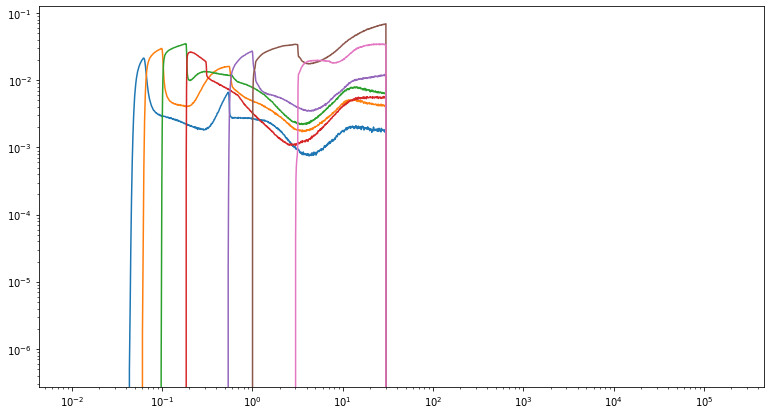

In [102]:
fig, ax = plt.subplots(1,1, figsize=(13,7))

ax.set_yscale("log")
ax.set_xscale("log")

for col in response_df.columns:

    ax.plot(response_df.index, response_df[col], label=col)

plt.show()

In [104]:
# response_df.to_csv("sixs_side1_electron_responses.csv")

In [ ]:
# Reading csv and 

In [109]:
response_df = pd.read_csv("sixs_side0_electron_responses.csv", index_col="incident_energy")
display(response_df)

,E1,E2,E3,E4,E5,E6,E7
incident_energy,,,,,,,
0.010045,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010136,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010227,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010320,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010413,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
193690.970402,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195440.977005,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197206.794997,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
from Bowtie.bowtie_util import calculate_bowtie_gf, generate_exppowlaw_spectra

In [115]:
energy_grid

{'nstep': 1870,
 'midpt': array([1.00450736e-02, 1.01358313e-02, 1.02274090e-02, ...,
        1.97206795e+05, 1.98988567e+05, 2.00786438e+05]),
 'ehigh': array([1.00903504e-02, 1.01815172e-02, 1.02735077e-02, ...,
        1.98095678e+05, 1.99885481e+05, 2.01691455e+05]),
 'enlow': array([ -1869.98990965,  -1869.98981848,  -1869.98972649, ...,
        196225.67785503, 198015.48118735, 199821.45547303]),
 'binwd': array(1870)}

In [141]:
def assemble_response_matrix(response_df) ->list[dict]:
    """
    Assembles the response matrix needed by 'calculate_bowtie_gf()' from
    an input dataframe.
    """
    
    response_matrix = []
    for col in response_df.columns:

        response_matrix.append({
            "name": col,
            "grid": response_df.index.values,
            "resp": response_df[col].values
        })
    
    return response_matrix

In [134]:
gamma_min = -4.0
gamma_max = -1.5
gamma_steps = 100
cutoff_energy = 0.002

# MeV:
bowtie_min_energy = 0.01
bowtie_max_energy = 50.0

use_integral_bowtie:bool = False
sigma:int = 3
    
plot:bool = True
    
gfactor_confidence_level:float = 0.9

In [135]:
power_law_spectra = generate_exppowlaw_spectra(energy_grid_dict=energy_grid, gamma_pow_min=gamma_min,
                                               gamma_pow_max=gamma_max, num_steps=gamma_steps,
                                               cutoff_energy=cutoff_energy)

In [136]:
power_law_spectra

[{'gamma': -4.0,
  'spect': array([1.00000000e-30, 7.40971603e+07, 7.16745376e+07, ...,
         6.61169020e-22, 6.37804377e-22, 6.15265404e-22])},
 {'gamma': -3.974747474747475,
  'spect': array([1.00000000e-30, 6.59848871e+07, 6.38419959e+07, ...,
         8.99544482e-22, 8.67953156e-22, 8.37471293e-22])},
 {'gamma': -3.9494949494949494,
  'spect': array([1.00000000e-30, 5.87607583e+07, 5.68653887e+07, ...,
         1.22386296e-21, 1.18115006e-21, 1.13992785e-21])},
 {'gamma': -3.9242424242424243,
  'spect': array([1.00000000e-30, 5.23275384e+07, 5.06511801e+07, ...,
         1.66511004e-21, 1.60736264e-21, 1.55161796e-21])},
 {'gamma': -3.898989898989899,
  'spect': array([1.00000000e-30, 4.65986375e+07, 4.51160557e+07, ...,
         2.26544274e-21, 2.18737206e-21, 2.11199181e-21])},
 {'gamma': -3.8737373737373737,
  'spect': array([1.00000000e-30, 4.14969457e+07, 4.01858058e+07, ...,
         3.08221718e-21, 2.97667521e-21, 2.87474723e-21])},
 {'gamma': -3.8484848484848486,
  'spec

In [142]:
response_matrix1 = assemble_response_matrix(response_df=response_df)

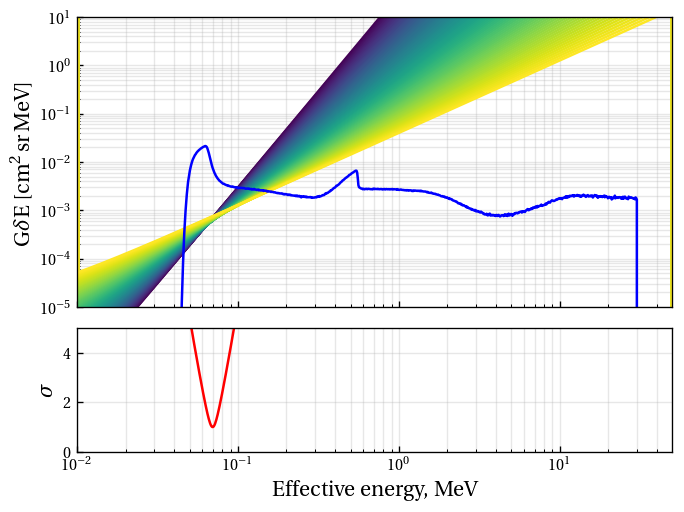

In [143]:
response = response_matrix[0]

bowtie_results = calculate_bowtie_gf(response_data=response, model_spectra=power_law_spectra,
                                     emin=bowtie_min_energy, emax=bowtie_max_energy,
                                     gamma_index_steps=gamma_steps, use_integral_bowtie=use_integral_bowtie,
                                     sigma=sigma, plot=plot, gfactor_confidence_level=gfactor_confidence_level,
                                     return_gf_stddev=True)